# Import libraries

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classification

Dataset

In [6]:
data = pd.read_csv("./diabetes.csv", header=0)

* Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* Diastolic blood pressure (mm Hg).
* Triceps skinfold thickness (mm).
* 2-hour serum insulin (mu U/ml).
* Body mass index (weight in kg/(height in m)^2).
* Diabetes pedigree function.
* Age (years).
* Class variable (0 or 1).

In [7]:
data.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

In [9]:
X = data.drop(columns=['class'])


In [10]:
y = data['class']

In [11]:
print('Label distribution:')
data['class'].value_counts()

Label distribution:


0    500
1    268
Name: class, dtype: int64

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()

In [ ]:
X_scale = scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

# Stratified K-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 614, Test set:154
Fold:2, Train set: 614, Test set:154
Fold:3, Train set: 614, Test set:154
Fold:4, Train set: 615, Test set:153
Fold:5, Train set: 615, Test set:153


In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators= val, random_state=42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.767
Average score(100): 0.769
Average score(150): 0.768
Average score(200): 0.762
Average score(250): 0.767
Average score(300): 0.766
Average score(350): 0.769


# Not using K-Fold

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)

Support vector
76.62337662337663


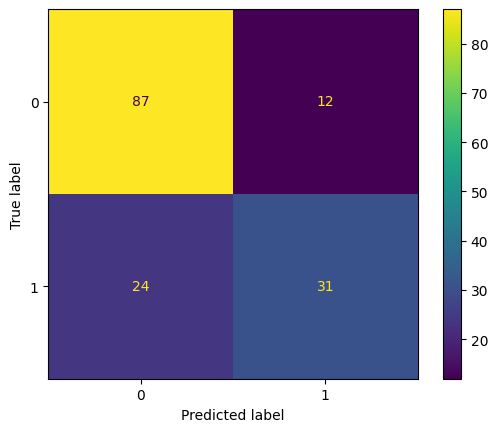



Logistic regression
74.67532467532467


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


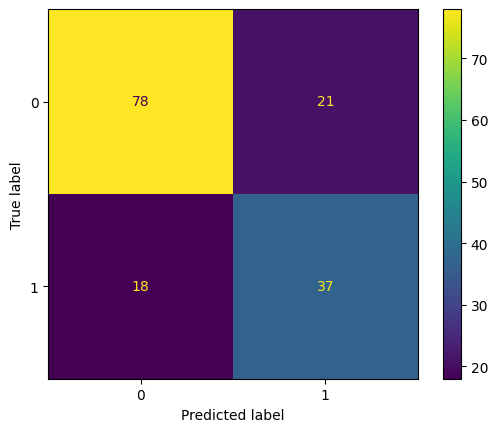



Random Forest
70.12987012987013


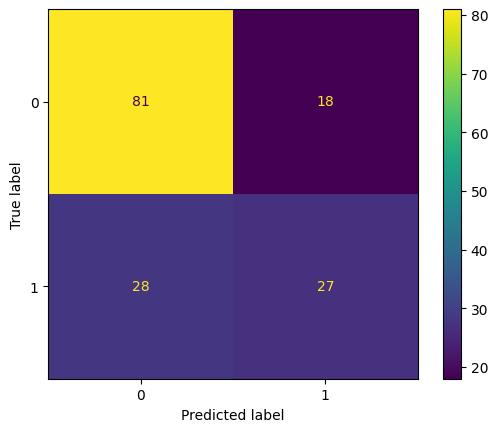



Decision Trees
74.02597402597402


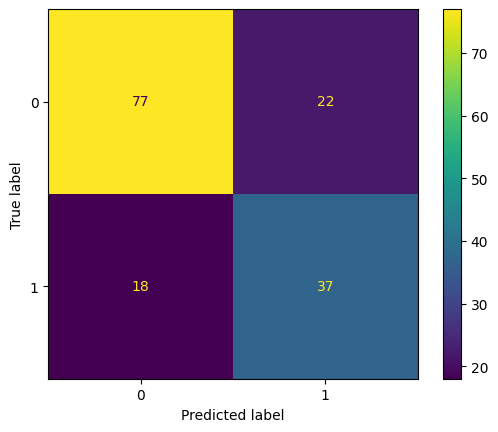



KNeighbourClassifier
68.83116883116884


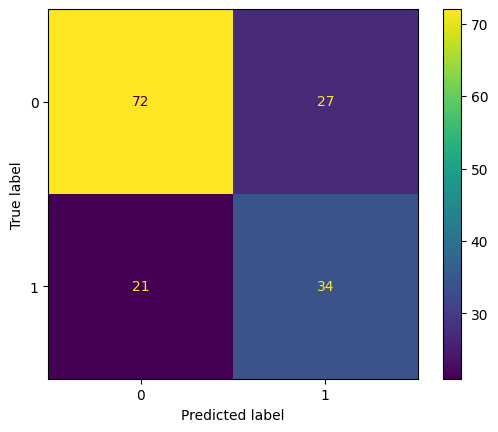



XGBoost
70.77922077922078


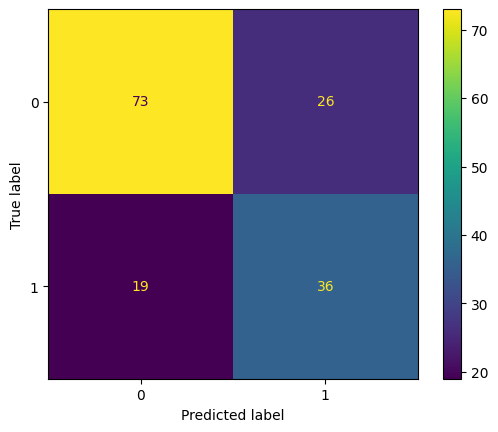



Adaboost
74.02597402597402


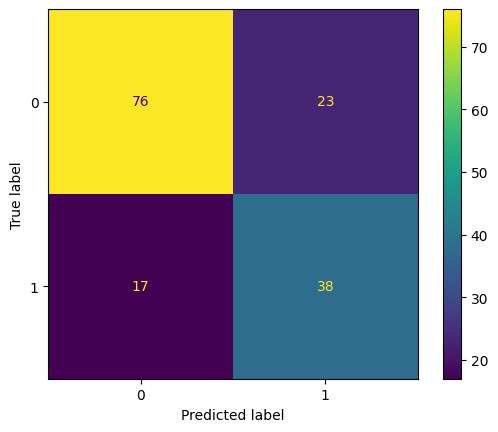



MLP Classifier
67.53246753246754


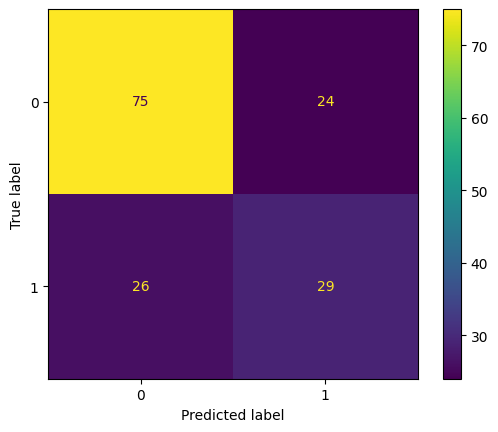



Gradient Boosting
68.83116883116884


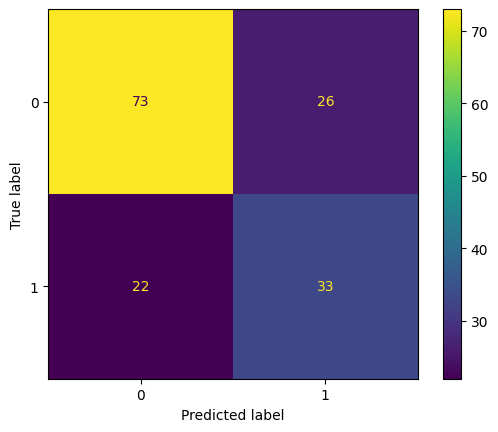



Adaboost
74.02597402597402


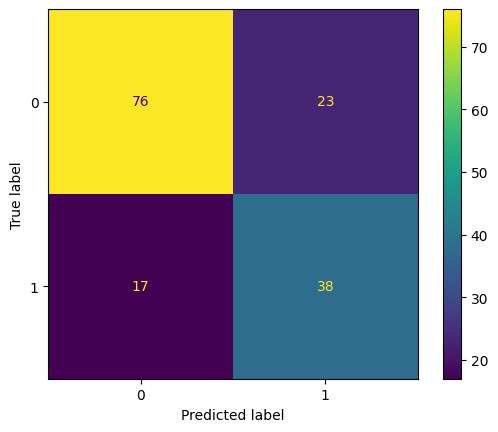

In [18]:
models = [[SVC(), "Support vector"],
        [LogisticRegression(), "Logistic regression"],
         [RandomForestClassifier(n_estimators = 10), "Random Forest"],
         [DecisionTreeClassifier(max_depth = 7), "Decision Trees"],
         [KNeighborsClassifier(n_neighbors = 7), "KNeighbourClassifier"],
         [xgb.XGBClassifier(objective="binary:logistic", random_state=42), "XGBoost"],
         [AdaBoostClassifier(n_estimators = 25), "Adaboost"],
         [MLPClassifier(random_state=1, max_iter=300), "MLP Classifier"],
         [GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=0), "Gradient Boosting"],
         [AdaBoostClassifier(n_estimators = 25), "Adaboost"]]
model_acc = []
for i in models:
    name = i[1]
    model = i[0]
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(acc)
    cm = confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    model_acc.append([name, acc])
    plt.show()
    print("\n")

Test